# 1st Assignment-- Moamin Abdulkareem

## Problem 1.4 Page 35
- We use an artificial data set to study the perceptron learning algorithm . This problem leads you to explore the algorithm further with data sets of different sizes a n d dimensions


In [2]:
# First we have to import some packages
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')


- Generate a linearly separable data set of size 20. Plot the examples {($x_n$ , $Y_n$)} as well as the target function $f$ on a plane. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot.
- Run the perceptron learning algorithm on the data set a bove. Report the number of updates that the algorithm takes before converging. Plot the examples { ($x_n$, $Y_n$) } , the target function $f$, and the final hypothesis $g$ in the same figure. Comment on whether $f$ is close to $g$.

In [3]:
class perceptron:

    def __init__(self, **kwargs):

        self.n = kwargs.get('n', None)
        self.max_iteration = kwargs.get('max_iteration', None)
        self.stop = kwargs.get('stop', None)

        xa, ya, xb, yb = [random.uniform(-1, 1) for i in range(4)]

        self.w = np.array([xb * ya - xa * yb, yb - ya, xa - xb])

        self.datapoints = self.generate_pionts(num=self.n)

    def generate_pionts(self, num):

        X = list()
        for i in range(num):
            x1, x2 = [random.uniform(-1, 1) for i in range(2)]
            x = np.array([1, x1, x2])
            s = int(np.sign(self.w.T.dot(x)))
            X.append((x, s))

        return X


    def pla(self):

        y = list()
        x = list()

        for i in range(len(self.datapoints)):
            y.append(self.datapoints[i][1])
            x.append(self.datapoints[i][0])
        x = np.asarray(x)

        X = x[:, 1:]
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4)
        clf = Perceptron(max_iter=self.max_iteration, tol=self.stop, fit_intercept=False)
        clf.fit(X_train, Y_train)
        y_pred = clf.predict(X_test)

        score = np.mean(y_pred == Y_test) * 100
        weights = clf.coef_

        intercept = clf.intercept_
        wh = [intercept[0], weights[0][0], weights[0][1]]

        print("The coefficients of the target function: ", self.w)
        print("Accuracy score on the test set: ", np.mean(y_pred == Y_test) * 100)

        print("The coefficients after applying perceptron from sklearn: ",wh)
        print("The total number of iterations until the convergence: ", clf.n_iter_)
        plt.figure(figsize=(10, 6))
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        a, b = -self.w[1] / self.w[2], -self.w[0] / self.w[2]
        u, t = -wh[1] / wh[2], -wh[0] / wh[2]
        l = np.linspace(-1, 1)
        plt.plot(l, a * l + b, 'k-')
        cols = {1: 'r', -1: 'b'}
        for x, s in self.datapoints:
            plt.plot(x[1], x[2], cols[s] + 'o')
        plt.plot(l, u * l + t, color='g')
        plt.show()
    def main(self):

        
        perceptron.pla(self)


The coefficients of the target function:  [0.0831374  0.6712957  0.27507918]
Accuracy score on the test set:  75.0
The coefficients after applying perceptron from sklearn:  [0.0, 0.40414355573657446, 0.2587106144745184]
The total number of iterations until the convergence:  2


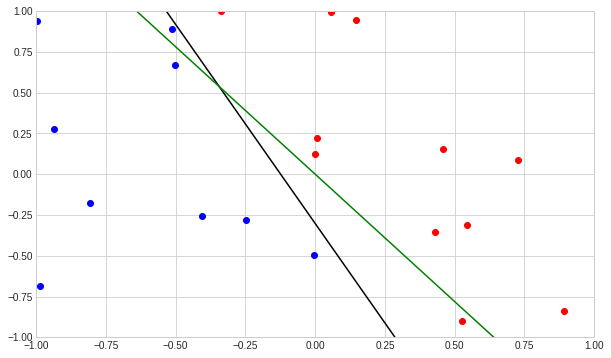

In [4]:
p1 = perceptron(n=20, max_iteration=1000, stop=0.0001)
p1.main()

### Repeat everything in (b) with another randomly generated data set of size 20.  Compare you're results with (b) .

The coefficients of the target function:  [ 0.04871848 -0.19559226  0.40746354]
Accuracy score on the test set:  100.0
The coefficients after applying perceptron from sklearn:  [0.0, -0.4934664245456961, 1.6596903854988088]
The total number of iterations until the convergence:  3


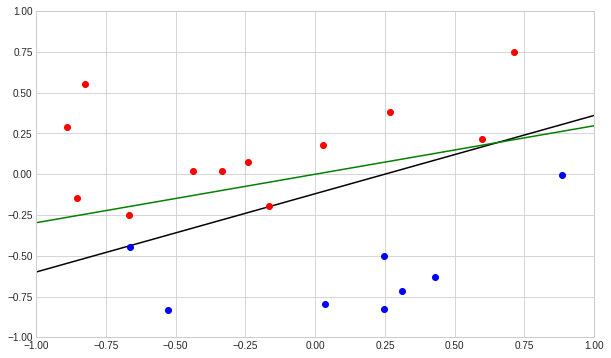

In [5]:
p2 = perceptron(n=20, max_iteration=1000, stop=0.0001)
p2.main()

### Repeat everything in (b) with a nother randomly generated data set of size 100. Compare you're results with (b).

The coefficients of the target function:  [0.18476912 1.88995223 0.09711068]
Accuracy score on the test set:  95.0
The coefficients after applying perceptron from sklearn:  [0.0, 1.878761534960677, 0.40560137832956644]
The total number of iterations until the convergence:  3


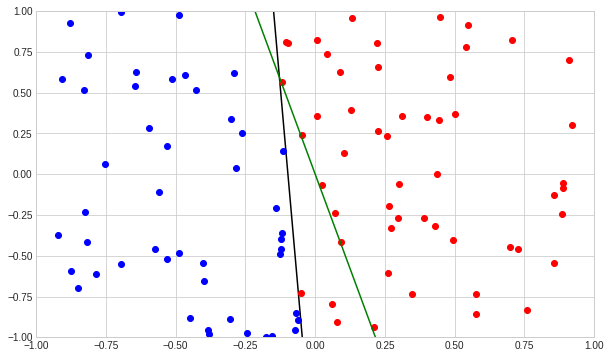

In [13]:
p3 = perceptron(n=100, max_iteration=1000, stop=0.0001)
p3.main()

### Repeat everything in (b) with another randomly generated data set of size 1, 000. Compare you're results with (b) .

The coefficients of the target function:  [0.0680467  0.03265854 0.36748921]
Accuracy score on the test set:  90.5
The coefficients after applying perceptron from sklearn:  [0.0, 0.21379571744083226, 1.1956572688817733]
The total number of iterations until the convergence:  2


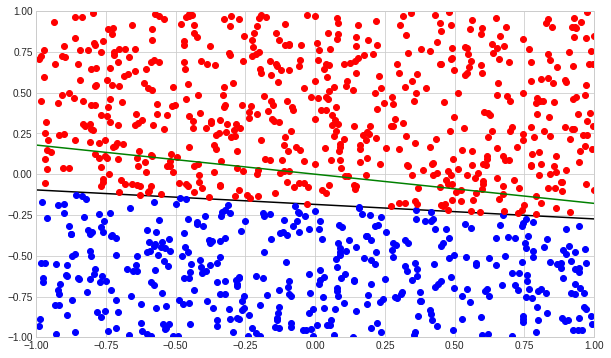

In [20]:
p4 = perceptron(n=1000, max_iteration=1000, stop=0.00001)
p4.main()

### Modify the algorithm such that it takes $X_n$ $\in$ $\mathbb{R}^{10}$ instead of $\mathbb{R}^2$ . Randomly generate a linearly separable data set of size 1, 000 with $X_n$ $\in$ $\mathbb{R}^{10}$ and feed the dataset to the a lgorithm. How many updates does the algorithm take to converge?

In [34]:

def generate_pionts2(num):

    X = list()
    y = list()
    # number of features is 10
    
    weights2 = np.array([random.uniform(-1,1) for i in range(11)])
    
    # Taking the transpose of the weights vector so we can apply that in the dot product
    wt = weights2.T
    for i in range(num):
        x = [random.uniform(-1, 1) for i in range(10)]
        X.append(x)
    X = np.asarray(X)
    # Adding the intercept
    weights2 = [random.uniform(-1,1) for i in range(10)]
    
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))
    for i in range(len(X)):
        s = int(np.sign(wt.dot(X[i])))
        y.append(s)
        
    return X, y

points,  target = generate_pionts2(1000)
X_train,X_test, Y_train,Y_test = train_test_split(points,target,test_size=0.4)




In [33]:
for i in range(100):
    clf2 = Perceptron(max_iter=1000, tol=0.00001, fit_intercept=False)
    clf2.fit(X_train,Y_train)
    y_pred = clf2.predict(X_test)
    print("The number of iterations until convergence: ", clf2.n_iter_)
    print("Accuracy on the test set: ",np.mean(Y_test==y_pred)*100)


The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergence:  5
Accuracy on the test set:  96.75
The number of iterations until convergen